# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [1]:
import numpy as np
import pylab as pl
import scipy as sp 
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df_ = pd.read_csv('https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv')
pop= pd.read_csv('https://raw.githubusercontent.com/xiaoninh/PUI2018_xh1163/master/HW9_xh1163/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv',skiprows = 3)
ms= pd.read_csv('https://raw.githubusercontent.com/xiaoninh/PUI2018_xh1163/master/HW9_xh1163/data-pvLFI.csv')
gdp= pd.read_csv('https://raw.githubusercontent.com/xiaoninh/PUI2018_xh1163/master/HW9_xh1163/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv',skiprows = 3)

In [3]:
df_ = df_[['Country/Territory','Number of homicides by firearm','Average total all civilian firearms']]
df_.rename(columns = {'Country/Territory':'Country Name'}, inplace=True)
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [4]:
pop = pop[['Country Name', '2012']]
pop.rename(columns = {'2012':'Population'}, inplace=True)
pop.head()

,Country Name,Population
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [5]:
gdp = gdp[['Country Name', '2012']]
gdp.rename(columns = {'2012':'GDP'}, inplace=True)
gdp.head()

,Country Name,GDP
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [6]:
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [7]:
df_ = df_.merge(pop, on="Country Name")
df_ = df_.merge(gdp, on="Country Name")
df_ = df_.merge(ms, right_on="Country", left_on="Country Name")
df_.head()

,Country Name,Number of homicides by firearm,Average total all civilian firearms,Population,GDP,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,30.0,3050000.0,22742475.0,1.543411e+12,Australia,15.0,4
1,Austria,18.0,2500000.0,8429991.0,4.094252e+11,Austria,30.4,1
2,Belgium,70.0,1800000.0,11128246.0,4.978842e+11,Belgium,17.2,2
3,Canada,173.0,9950000.0,34750545.0,1.824289e+12,Canada,30.8,4
4,Denmark,15.0,650000.0,5591572.0,3.271489e+11,Denmark,12.0,0


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


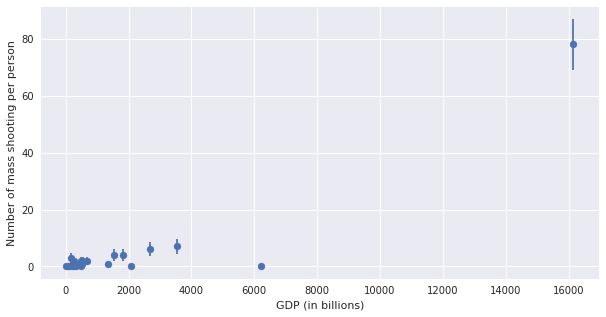

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [8]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.GDP / 1e9, df_['Number of mass shootings (1983-2013)'])
ax.errorbar(df_.GDP/ 1e9, df_['Number of mass shootings (1983-2013)'], 
            yerr = np.sqrt(df_['Number of mass shootings (1983-2013)'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


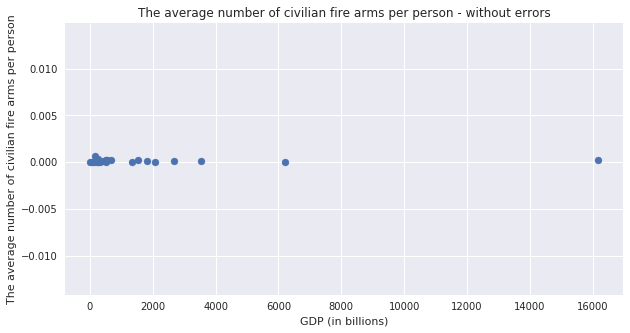

In [9]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_['shootingspp'] = df_["Number of mass shootings (1983-2013)"] / df_['Population'] * 1e3
scatter = ax.scatter(df_.GDP / 1e9, df_['shootingspp'])

ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("The average number of civilian fire arms per person")
pl.title("The average number of civilian fire arms per person - without errors") 
ax.set_ylim()


pl.show()

#### Caption: there is no obvious difference in the average number of civilian firearms per person in countries with different GDP when plotting without errors.#### Caption: there is no obvious difference in the average number of civilian firearms per person in countries with different GDP when plotting without errors.


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


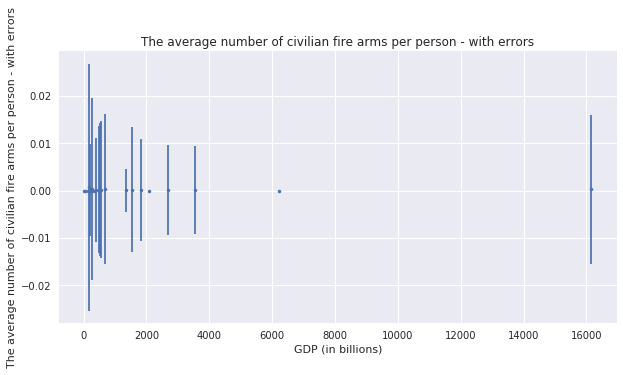

In [10]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
ax.errorbar(df_['GDP'] / 1e9 , df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp']), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("The average number of civilian fire arms per person - with errors")
pl.title("The average number of civilian fire arms per person - with errors") 
ax.set_ylim()



pl.show()

#### Caption: When plotting with errors,  we can see countries with the lowest and highest GPD have relatively high errors in their average number of civilian firearms per person.

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

(-0.1586082260190626, 0.21686425132650933)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


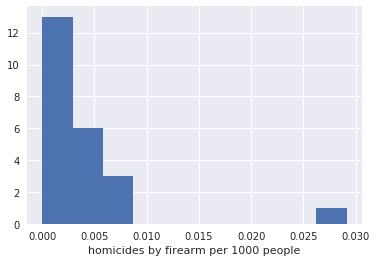

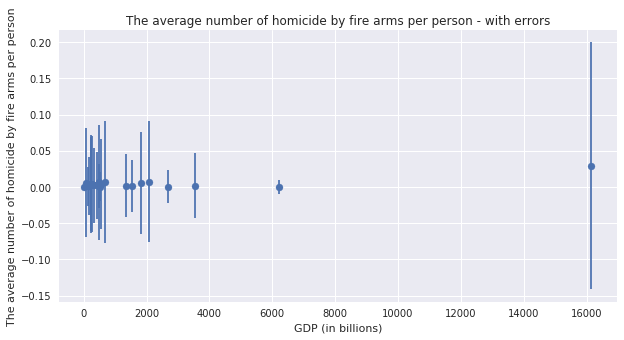

In [11]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['Population'] * 1000)
ax.set_xlabel('homicides by firearm per 1000 people');

fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)


scatter = ax.scatter(df_.GDP / 1e9, df_['Number of homicides by firearm'] / df_['Population'] * 1000)
ax.errorbar(df_['GDP'] / 1e9 , df_['Number of homicides by firearm'] / df_['Population'] * 1000, 
            yerr = np.sqrt(df_['Number of homicides by firearm'] / df_['Population'] * 1000), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("The average number of homicide by fire arms per person")
pl.title("The average number of homicide by fire arms per person - with errors") 
ax.set_ylim()



#### Caption: In the histergram, there is one potential outlier at 0.003. When plotting against the data country GDP with statistical errors, we can see the potential outlier at 0.003 is in USA,  which has noth the highest GDP.

## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


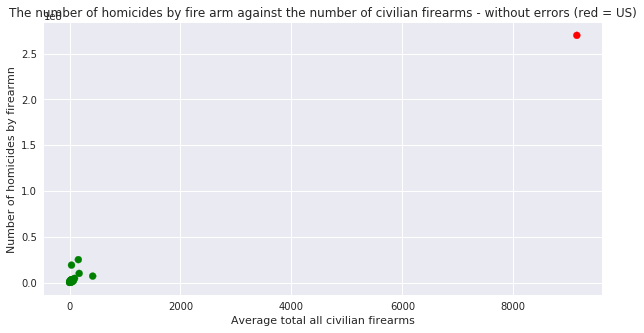

In [12]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

C= (df_['Country Name'] == 'United States').map({0: 'G', 1: 'R'})

scatter = ax.scatter(df_['Number of homicides by firearm'],df_['Average total all civilian firearms'],color=(C))

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearmn")
pl.title("The number of homicides by fire arm against the number of civilian firearms - without errors (red = US)") 
ax.set_ylim()



pl.show()

#### Caption: The plot shows the number of homicides by fire arm against the number of civilian firearms. The red dot represents US which has both high number of civilian firearms and number of homicides by fire.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


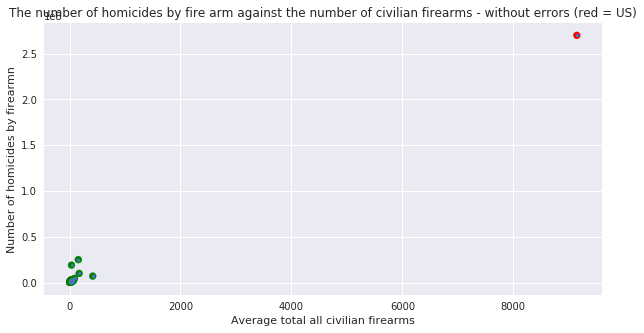

In [13]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['Number of homicides by firearm'],df_['Average total all civilian firearms'],color=C)
ax.errorbar( df_['Number of homicides by firearm'], df_['Average total all civilian firearms'] ,
            yerr = np.sqrt(df_['Average total all civilian firearms']), fmt = '.')


ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of homicides by firearmn")
pl.title("The number of homicides by fire arm against the number of civilian firearms - without errors (red = US)") 
ax.set_ylim()

pl.show()

#### Caption: The plot shows the number of homicides by fire arm against the number of civilian firearms with errors. The errors are small. The red dot represents US which has both high number of civilian firearms and number of homicides by fire.

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


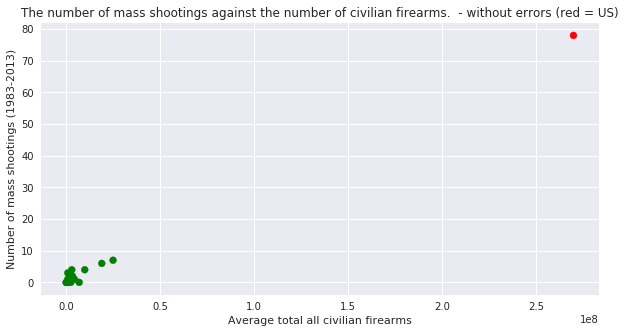

In [14]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
        
scatter = ax.scatter(df_['Average total all civilian firearms'],df_['Number of mass shootings (1983-2013)'],color=(C))

ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
pl.title("The number of mass shootings against the number of civilian firearms.  - without errors (red = US)") 
ax.set_ylim()



pl.show()

#### Caption: The plot shows the number of mass shootings  against the number of civilian firearms without errors. The red dot represents US which has both high number of civilian firearms and number of homicides by fire.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


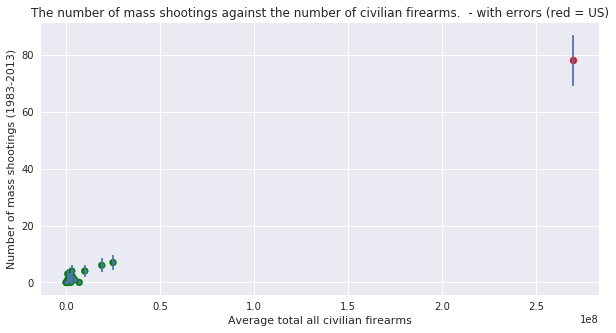

In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)
        
scatter = ax.scatter(df_['Average total all civilian firearms'],df_['Number of mass shootings (1983-2013)'],color=C)
ax.errorbar( df_['Average total all civilian firearms'],df_['Number of mass shootings (1983-2013)'],
            yerr = np.sqrt(df_['Number of mass shootings (1983-2013)']), fmt = '.')



ax.set_xlabel("Average total all civilian firearms")
ax.set_ylabel("Number of mass shootings (1983-2013)")
pl.title("The number of mass shootings against the number of civilian firearms.  - with errors (red = US)") 
ax.set_ylim()



pl.show()

#### Caption: The plot shows the number of mass shootings  against the number of civilian firearms without errors. The red dot represents US which has both high number of civilian firearms and number of homicides by fire.

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


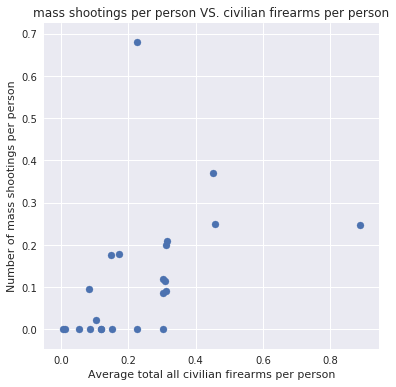

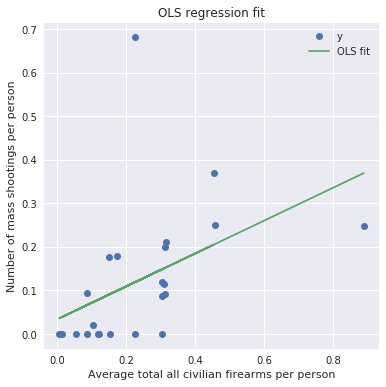

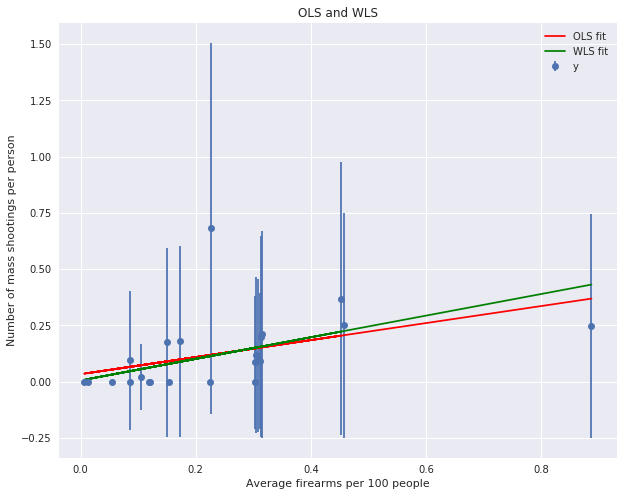

In [16]:
x= df_['Guns per 100 inhabitants']/100
y= df_["Number of mass shootings (1983-2013)"]/df_['Population']* 1e6

#Data
fig = pl.figure(figsize=(6,6)) 
ax = fig.add_subplot(111)
scatter = ax.scatter(x, y)
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
pl.title("mass shootings per person VS. civilian firearms per person")
ax.set_ylim()

#Plot OLS 
fig = pl.figure(figsize=(6,6)) 
ax = fig.add_subplot(111)
model = sm.OLS(y,sm.add_constant(x)).fit()
line = model.fittedvalues
pl.plot(x, y, 'o',label='y')
pl.plot(x,line, '-', label='OLS fit')
ax.set_xlabel("Average total all civilian firearms per person")
ax.set_ylabel("Number of mass shootings per person")
pl.title("OLS regression fit")
pl.legend()

#WLS
weights = [100/np.sqrt(i) for i in x]
model_2 = sm.WLS(y, sm.add_constant(x), weights=weights).fit()
line_2 = model_2.fittedvalues

#Plot OLS and WLS with errors
fig = pl.figure(figsize=(10,8)) 
ax = fig.add_subplot(111)
pl.errorbar(x, y, yerr = np.sqrt(y), fmt = 'o', label = 'y')
pl.plot(x,line, '-', label='OLS fit',c = 'red')
pl.plot(x,line_2, '-', label='WLS fit',c = 'green')
ax.set_xlabel("Average firearms per 100 people")
ax.set_ylabel("Number of mass shootings per person")
pl.legend()
pl.title("OLS and WLS")

pl.show()

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595